In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/ML/classification/naive_bayes/spam.csv", encoding = 'unicode_escape')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### ham is good mail and spam is bad

In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham          847    828                             Sorry, I'll call later   
spam         152    146  Today's Offer! Claim ur £150 worth of discount...   

               
         freq  
Category       
ham         6  
spam        2

In [5]:
df['spam'] = df['Category'].apply(lambda x : 1 if(x=='spam') else 0)

In [6]:
df.head() #here if spam then 1. if not then 0

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.4)

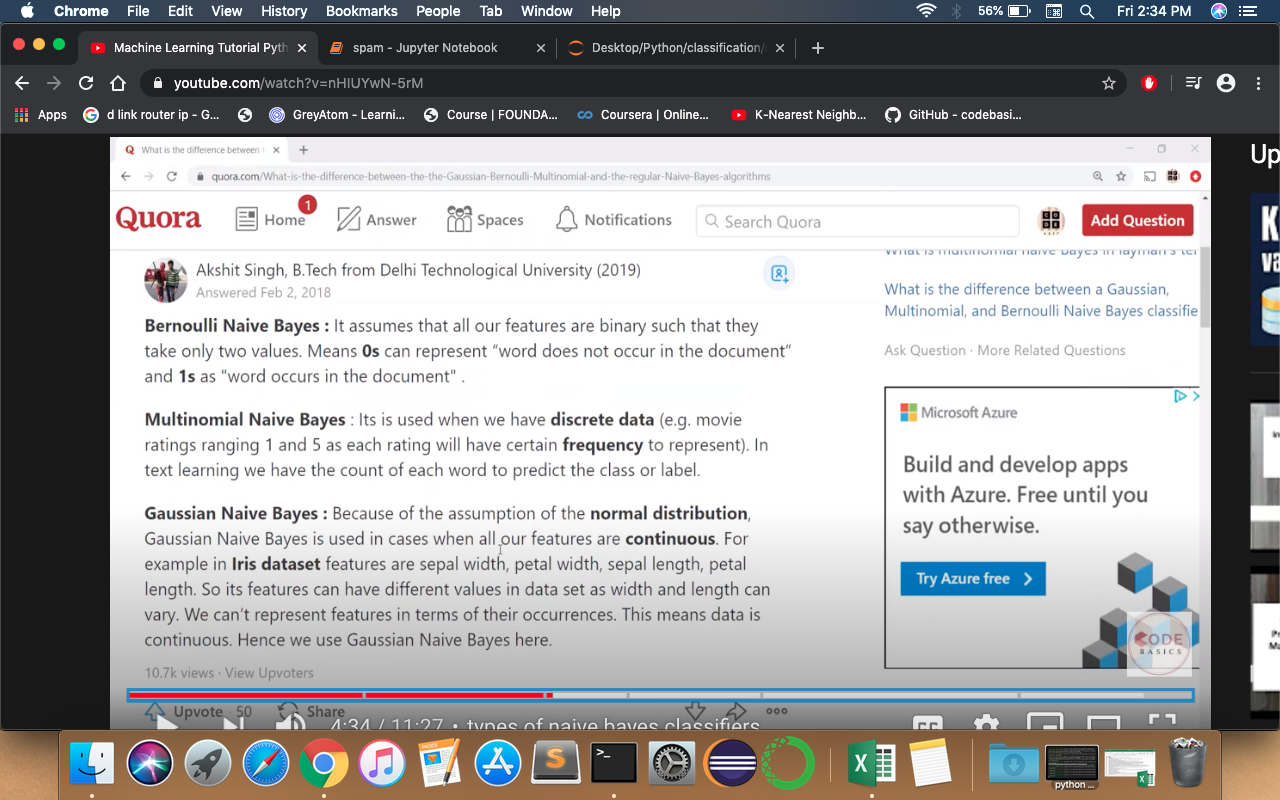

### Here as we see there are 3 classifier in Naive Byes, we choose MultinomialNM

In [8]:
from sklearn.naive_bayes import MultinomialNB

### To prepare Text data (here df.Message) we use CountVectorizer for more detail click on [here](https://www.youtube.com/watch?v=nHIUYwN-5rM)  on (2.51 sec) time 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
clf = Pipeline([('vectorize',CountVectorizer()),('nb',MultinomialNB())])

In [12]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorize', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
clf.score(x_test,y_test)

0.9725

In [32]:
clf.predict(['Hiii how are you'])# this is not spam message so op is 0

array([0])

In [15]:
clf.predict(['20% discount'])# this is spam message so op is 1

array([1])

In [16]:
import joblib

In [17]:
joblib.dump(clf,"Email_Spam_detector.pkl")

['Email_Spam_detector.pkl']

In [18]:
model = joblib.load("Email_Spam_detector.pkl")

In [19]:
model.predict(['Hiii how are you']) #here this not spam message so op is 0

array([0])